# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [59]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

Again, I'll load the NSFG pregnancy file and select live births:

In [60]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights:

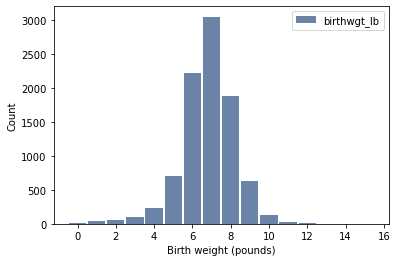

In [61]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

To normalize the distribution, we could divide through by the total count:

In [62]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

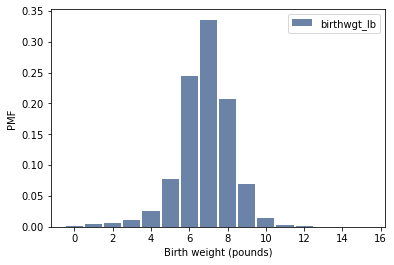

In [63]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='PMF')

More directly, we can create a Pmf object.

In [64]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [65]:
pmf.Prob(2)

0.4

The bracket operator does the same thing.

In [66]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [67]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [68]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [69]:
pmf.Total()

0.8999999999999999

`Normalize` divides through by the total probability, making it 1 again.

In [70]:
pmf.Normalize()
pmf.Total()

1.0

Here's the PMF of pregnancy length for live births.

In [71]:
pmf = thinkstats2.Pmf(live.prglngth, label='prglngth')

Here's what it looks like plotted with `Hist`, which makes a bar graph.

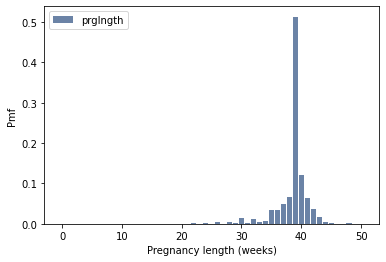

In [72]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

Here's what it looks like plotted with `Pmf`, which makes a step function.

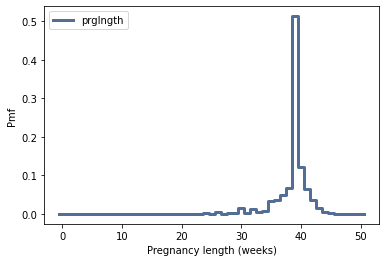

In [73]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Pregnancy length (weeks)', ylabel='Pmf')

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [74]:
live, firsts, others = first.MakeFrames()

Here are the distributions of pregnancy length.

In [75]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='firsts')
other_pmf = thinkstats2.Pmf(others.prglngth, label='others')

And here's the code that replicates one of the figures in the chapter.

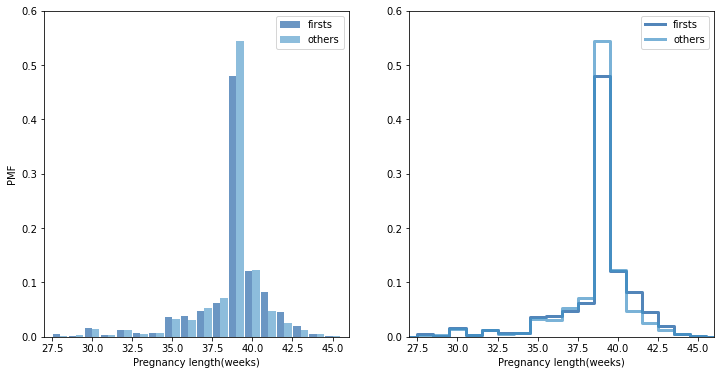

In [76]:
width=0.45
axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='PMF', axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Pregnancy length(weeks)', axis=axis)

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

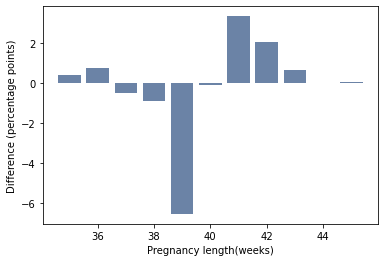

In [77]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(xlabel='Pregnancy length(weeks)', ylabel='Difference (percentage points)')


### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [78]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

pmf = thinkstats2.Pmf(d, label='actual')

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [79]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

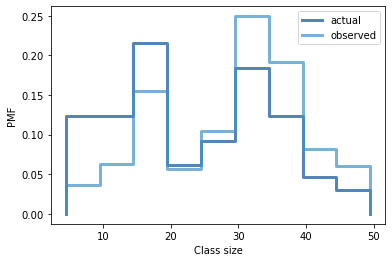

In [80]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [81]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 23.692307692307693
Observed mean 29.123376623376625


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [82]:
def UnbiasPmf(pmf, label=None):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf[x] *= 1/x
        
    new_pmf.Normalize()
    return new_pmf

We can unbias the biased PMF:

In [83]:
unbiased = UnbiasPmf(biased_pmf, label='unbiased')
print('Unbiased mean', unbiased.Mean())

Unbiased mean 23.69230769230769


And plot the two distributions to confirm they are the same.

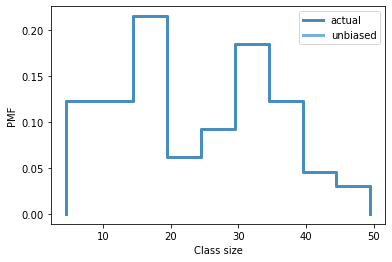

In [84]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, unbiased])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

### Pandas indexing

Here's an example of a small DataFrame.

In [85]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,-1.163920,-0.548065
1,0.982753,0.747889
2,-1.001181,0.129083
3,-1.328124,0.736885


We can specify column names when we create the DataFrame:

In [86]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,-1.163920,-0.548065
1,0.982753,0.747889
2,-1.001181,0.129083
3,-1.328124,0.736885


We can also specify an index that contains labels for the rows.

In [87]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,-1.163920,-0.548065
b,0.982753,0.747889
c,-1.001181,0.129083
d,-1.328124,0.736885


Normal indexing selects columns.

In [88]:
df['A']

a   -1.163920
b    0.982753
c   -1.001181
d   -1.328124
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [89]:
df.loc['a']

A   -1.163920
B   -0.548065
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [90]:
df.iloc[0]

A   -1.163920
B   -0.548065
Name: a, dtype: float64

`loc` can also take a list of labels.

In [91]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,-1.163920,-0.548065
c,-1.001181,0.129083


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [92]:
df['a':'c']

,A,B
a,-1.163920,-0.548065
b,0.982753,0.747889
c,-1.001181,0.129083


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [93]:
df[0:2]

,A,B
a,-1.163920,-0.548065
b,0.982753,0.747889


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [94]:
resp = nsfg.ReadFemResp()
live = preg[preg.outcome == 1]

In [95]:
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

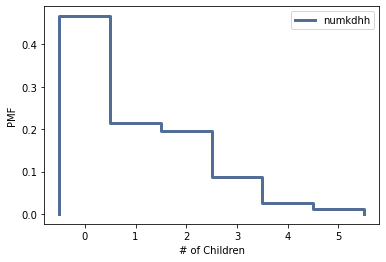

In [96]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='# of Children', ylabel='PMF')

In [97]:
biased = BiasPmf(pmf, label='biased')

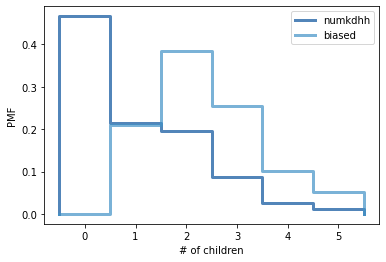

In [98]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf,biased])
thinkplot.Config(xlabel='# of children', ylabel='PMF')

In [99]:
pmf.Mean()

1.024205155043831

In [100]:
biased.Mean()

2.403679100664282

In [101]:
# Excercise 3-2
def PmfMean(pmf):
    mean = 0.0
    for x,p in pmf.Items():
        mean += p * x
    return mean

def PmfVar(pmf):
    var = 0.0
    for x,p in pmf.Items():
        var += p * (x-pmf.Mean()) ** 2
    return var

actual_mean_test=PmfMean(pmf)
biased_mean_test=PmfMean(biased)
actual_var_test=PmfVar(pmf)
biased_var_test=PmfVar(biased)

assert(actual_mean_test == pmf.Mean())
assert(biased_mean_test == biased.Mean())
assert(actual_var_test == pmf.Var())
assert(biased_var_test == biased.Var())

print('Actual Mean:', actual_mean_test)
print('Biased Mean', biased_mean_test)
print('Actural Var', actual_var_test)
print('Biased Var', biased_var_test)

Actual Mean: 1.024205155043831
Biased Mean 2.403679100664282
Actural Var 1.4128643263531195
Biased Var 1.1732721055059874


In [102]:
live, firsts, others = first.MakeFrames()

And compute the distribution of birth weight for first babies and others.

In [103]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))

 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

Firsts 4413 4363
Others 4735 4675


We can plot the PMFs on the same scale, but it is hard to see if there is a difference.

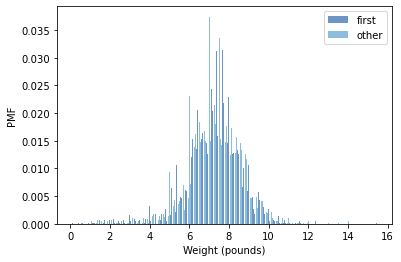

In [104]:
width = 0.4 / 16

# plot PMFs of birth weights for first babies and others
thinkplot.PrePlot(2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Weight (pounds)', ylabel='PMF')

`PercentileRank` computes the fraction of `scores` less than or equal to `your_score`.

In [105]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

Exercise: How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [106]:
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')
first_cdf.PercentileRank(6.5)

27.54985101994041

In [107]:
other_cdf.PercentileRank(6.5)

25.219251336898395

Exercise: The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [109]:
r = np.random.random(1000)

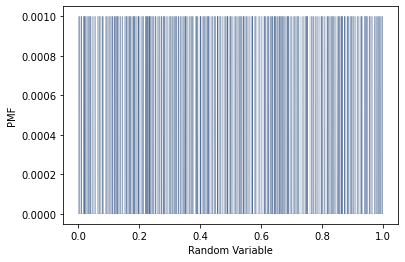

In [110]:
pmf = thinkstats2.Pmf(r)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random Variable', ylabel='PMF')

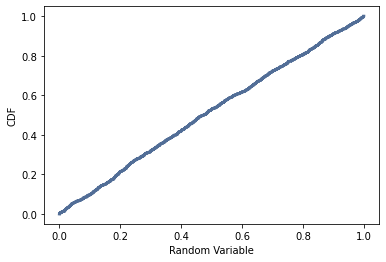

In [111]:
cdf = thinkstats2.Cdf(r)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random Variable', ylabel='CDF')